## Group classification

Here we grouped the most semantically similar standard names into 11 different groups, and then trained a classification model to classify the input into one of these groups(which will further be referenced as parent class).

### Augmenting Data

In [ ]:
import pandas as pd

data = pd.read_csv("labelled_data.csv")
# data.drop(data.columns[0], axis=1, inplace=True)
data.head()

,Analysis,Attribute,Standard names
0,HPLC,AEX-HPLC TOTAL ACIDIC PEAKS,AEX ACIDIC PEAKS
1,BIO_ICIEF,AEX HPLC-ACIDIC PEAKS,AEX ACIDIC PEAKS
2,HPLC,AEX TOTAL ACIDIC PEAKS,AEX ACIDIC PEAKS
3,HPLC,AEX-HPLC ACIDIC PEAKS,AEX ACIDIC PEAKS
4,BIO_ICIEF,AEX-HPLC TOTAL ACIDIC PEAKS,AEX ACIDIC PEAKS


In [ ]:
# Augment Data
import re

print("Shape of data before augmentation:", data.shape)
full_form = {
    "CE": "Capillary Electrophoresis",
    "SDS": "Sodium Dodecyl Sulfate",
    "PAGE": "Polyacrylamide Gel Electrophoresis",
    "RP": "Reverse Phase",
    "HPLC": "High-Performance Liquid Chromatography",
    "IEF": "Isoelectric Focusing",
    "iCIEF": "Isoelectric Focusing Capillary Electrophoresis",
    "ICIEF": "Isoelectric Focusing Capillary Electrophoresis",
    "CEX": "Cation Exchange",
    "AEX": "Anion Exchange",
    "SE": "Size Exclusion",
    "HIAC": "High-Accuracy Particle Counter",
    "UV": "Ultraviolet",
    "ELISA": "Enzyme-Linked Immunosorbent Assay",
    "SPR": "Surface Plasmon Resonance",
    "pH": "potential of Hydrogen",
    "A280": "Absorbance at 280 nanometers",
    "HHL": "Heavy-Heavy-Light",
    "HMW": "High Molecular Weight",
    "LMW": "Low Molecular Weight"
}
augmented_data = []
for idx in range(data.shape[0]):
    print(idx)
    for abbr in full_form.keys():
        pattern = rf'(^|[\s\-_])({re.escape(abbr)})($|[\s\-_])'

        if re.search(pattern, data.loc[idx, "Analysis"], flags=re.IGNORECASE):
            new_row = data.iloc[idx].copy()
            new_row["Analysis"] = re.sub(pattern, lambda m: f"{m.group(1)}{full_form[abbr]}{m.group(3)}", new_row["Analysis"], flags=re.IGNORECASE)
            augmented_data.append(new_row)
        if re.search(pattern, data.loc[idx, "Attribute"], flags=re.IGNORECASE):
            new_row = data.iloc[idx].copy()
            new_row["Attribute"] = re.sub(pattern, lambda m: f"{m.group(1)}{full_form[abbr]}{m.group(3)}", new_row["Attribute"], flags=re.IGNORECASE)
            augmented_data.append(new_row)
    data = pd.concat([data, pd.DataFrame(augmented_data)], ignore_index=True)

print("Shape of data after augmentation:", data.shape)


Shape of data before augmentation: (722, 3)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
26

In [ ]:
data.tail()

,Analysis,Attribute,Standard names
799824,CD137_BINDING_Surface Plasmon Resonance_ASSAY,CD137 Binding (Surface Plasmon Resonance),SPR Binding activity
799825,BINDING_Surface Plasmon Resonance,Binding Assay SPR Result (ka1),SPR Binding activity
799826,BINDING_SPR,Binding Assay Surface Plasmon Resonance Result...,SPR Binding activity
799827,BINDING_Surface Plasmon Resonance,Binding Assay SPR Result (kd1),SPR Binding activity
799828,BINDING_SPR,Binding Assay Surface Plasmon Resonance Result...,SPR Binding activity


In [ ]:
data.to_csv("augmented_labelled_data.csv", index=False)

---

# Training Model


In [19]:
import pandas as pd

data = pd.read_csv("augmented_labelled_data.csv")
data.shape

(799829, 3)

In [20]:
data.head()

,Analysis,Attribute,Standard names
0,HPLC,AEX-HPLC TOTAL ACIDIC PEAKS,AEX ACIDIC PEAKS
1,BIO_ICIEF,AEX HPLC-ACIDIC PEAKS,AEX ACIDIC PEAKS
2,HPLC,AEX TOTAL ACIDIC PEAKS,AEX ACIDIC PEAKS
3,HPLC,AEX-HPLC ACIDIC PEAKS,AEX ACIDIC PEAKS
4,BIO_ICIEF,AEX-HPLC TOTAL ACIDIC PEAKS,AEX ACIDIC PEAKS


In [22]:
# data = data.sample(frac=0.01, ignore_index=True)
data = data.groupby("Standard names").apply(lambda x: x.sample(n=min(len(x), 100), random_state=1)).reset_index(drop=True)
data.shape

<ipython-input-22-4c72b5c26ece>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby("Standard names").apply(lambda x: x.sample(n=min(len(x), 100), random_state=1)).reset_index(drop=True)


(3020, 3)

In [25]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [26]:
for idx, attr in data.iterrows():
    data.at[idx, "Analysis_tokens"] = " ".join(tokenizer.tokenize(attr["Analysis"]))
    data.at[idx, "Attribute_tokens"] = " ".join(tokenizer.tokenize(attr["Attribute"]))

In [27]:
attributes = data[["Analysis", "Analysis_tokens", "Attribute", "Attribute_tokens", "Standard names"]]
attributes

,Analysis,Analysis_tokens,Attribute,Attribute_tokens,Standard names
0,BIO_ICIEF,bio _ ic ##ie ##f,AEX-High-Performance Liquid Chromatography TOT...,ae ##x - high - performance liquid ch ##rom ##...,AEX ACIDIC PEAKS
1,High-Performance Liquid Chromatography,high - performance liquid ch ##rom ##ato ##graphy,AEX-HPLC TOTAL ACIDIC PEAKS,ae ##x - hp ##lc total acidic peaks,AEX ACIDIC PEAKS
2,BIO_ICIEF,bio _ ic ##ie ##f,Anion Exchange-HPLC TOTAL ACIDIC PEAKS,an ##ion exchange - hp ##lc total acidic peaks,AEX ACIDIC PEAKS
3,High-Performance Liquid Chromatography,high - performance liquid ch ##rom ##ato ##graphy,AEX-HPLC ACIDIC PEAKS,ae ##x - hp ##lc acidic peaks,AEX ACIDIC PEAKS
4,HPLC,hp ##lc,Anion Exchange-HPLC TOTAL ACIDIC PEAKS,an ##ion exchange - hp ##lc total acidic peaks,AEX ACIDIC PEAKS
...,...,...,...,...,...
3015,Y_SM_95007441_R,y _ sm _ 950 ##0 ##7 ##44 ##1 _ r,B7 BINDING Surface Plasmon Resonance,b ##7 binding surface pl ##as ##mon resonance,SPR Binding activity
3016,Y_SM_250196_R,y _ sm _ 250 ##19 ##6 _ r,B7 BINDING Surface Plasmon Resonance,b ##7 binding surface pl ##as ##mon resonance,SPR Binding activity
3017,Y_SM_95007441_R,y _ sm _ 950 ##0 ##7 ##44 ##1 _ r,B7 BINDING Surface Plasmon Resonance,b ##7 binding surface pl ##as ##mon resonance,SPR Binding activity
3018,Y_SM_95007441_R,y _ sm _ 950 ##0 ##7 ##44 ##1 _ r,B7 BINDING Surface Plasmon Resonance,b ##7 binding surface pl ##as ##mon resonance,SPR Binding activity


In [28]:
encoding = tokenizer(attributes["Analysis"].tolist(), attributes["Attribute"].tolist(), padding="max_length", truncation=True)
# encoding

In [29]:
encoding.keys()

dict_keys(['input_ids', 'attention_mask'])

In [30]:
import torch
from torch.utils.data import Dataset

class BMSDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# label2id = {label: idx for idx, label in enumerate(attributes["Standard names"].tolist())}
label2id = {
  "ce-sds (non-reduced) hhl": 0,
  "ce-sds (non-reduced) purity": 0,
  "ce-sds (reduced) purity": 0,
  "sds-page (non-reduced) purity": 0,
  "sds-page (reduced) purity": 0,
  "rp-hplc purity": 1,
  "ief acidic peaks": 2,
  "ief basic peaks": 2,
  "ief main peak": 2,
  "icief acidic peaks": 2,
  "icief basic peaks": 2,
  "icief main peak": 2,
  "cex acidic peaks": 2,
  "cex basic peaks": 2,
  "cex main peak": 2,
  "aex acidic peaks": 2,
  "aex basic peaks": 2,
  "aex main peak": 2,
  "se-hplc hmw": 3,
  "se-hplc lmw": 3,
  "se-hplc monomer": 3,
  "se-uplc hmw": 3,
  "se-uplc lmw": 3,
  "se-uplc monomer": 3,
  "particulate-matter >= 10-um": 4,
  "particulate-matter >= 25-um": 4,
  "potency by cell-based bioassay": 5,
  "potency by binding elisa": 6,
  "spr binding activity": 7,
  "ph": 8,
  "protein concentration (a280)": 9,
  "polysorbate 80": 10
}
id2label = {idx: label for label, idx in label2id.items()}
labels = [label2id[label.lower()] for label in attributes["Standard names"].tolist()]

dataset = BMSDataset(encodings=encoding, labels=labels)


In [31]:
from transformers import DistilBertForSequenceClassification

model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=11)
model.to('cuda')

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [32]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=5,              # total number of training epochs
    # per_device_train_batch_size=16,  # batch size per device during training
    # per_device_eval_batch_size=64,   # batch size for evaluation
    # warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    # logging_steps=10,
    learning_rate=2e-5,
    seed=224,
    logging_strategy="epoch",
    logging_steps=1
)

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=dataset,               # training dataset
)
trainer.train()
model.save_pretrained('./results')


Step,Training Loss
378,0.424800
756,0.012800
1134,0.004900
1512,0.003200
1890,0.002600


In [33]:
ana = "D_95007196"
attr = "PH"

test_str = tokenizer(ana, attr, padding="max_length", truncation=True, return_tensors="pt")

trained_model = DistilBertForSequenceClassification.from_pretrained('./results')
trained_model.eval()

res = trained_model(**test_str)
res = torch.softmax(res.logits, dim=1)
print(torch.max(res).item())
print(res)

print(int(res.argmax()))

0.8497650027275085
tensor([[0.0864, 0.0083, 0.0052, 0.0185, 0.0034, 0.0019, 0.0023, 0.0056, 0.8498,
         0.0118, 0.0068]], grad_fn=<SoftmaxBackward0>)
8


In [34]:
test_data = pd.read_csv("data.csv")
test_data = test_data.fillna("")
# test_data = test_data.iloc[2403:]
test_data.head()

,Analysis,Attribute
0,D_250475,IL2 INHIBITION ASSAY
1,D_95007196,PH
2,D_M00003744,ABATACEPT MAJOR BAND (REDUCED)
3,Y_SM_95011468_R,BIOASSAY
4,250684_CE_SDS_REDUC,SUM HEAVY AND LIGHT CHAIN


In [35]:
trained_model = DistilBertForSequenceClassification.from_pretrained('./results')
trained_model.eval()

for idx, row in test_data.iterrows():
  ana = row["Analysis"]
  attr = row["Attribute"]

  test_str = tokenizer(ana, attr, padding="max_length", truncation=True, return_tensors="pt")

  res = trained_model(**test_str)
  res = torch.softmax(res.logits, dim=1)
  test_data.at[idx, "P-Value"] = torch.max(res).item()
  test_data.at[idx, "Label"] = int(res.argmax())
  print(idx, test_data.loc[idx, "Label"], test_data.loc[idx, "P-Value"])

Streaming output truncated to the last 5000 lines.
2730 0.0 0.9991612434387207
2731 0.0 0.9991365075111389
2732 0.0 0.9991752505302429
2733 5.0 0.9938972592353821
2734 5.0 0.9938378930091858
2735 0.0 0.9990127086639404
2736 0.0 0.9982616305351257
2737 0.0 0.9990262985229492
2738 0.0 0.9985532164573669
2739 0.0 0.9985539317131042
2740 1.0 0.9957192540168762
2741 6.0 0.987331211566925
2742 6.0 0.9722302556037903
2743 0.0 0.9991791844367981
2744 0.0 0.9991697072982788
2745 6.0 0.991357684135437
2746 0.0 0.9991225600242615
2747 0.0 0.9991158843040466
2748 1.0 0.8371127247810364
2749 0.0 0.9991833567619324
2750 0.0 0.9991790652275085
2751 0.0 0.9991644620895386
2752 0.0 0.9991372227668762
2753 0.0 0.9991638660430908
2754 0.0 0.9991612434387207
2755 0.0 0.9991399049758911
2756 6.0 0.9913108348846436
2757 0.0 0.9951438903808594
2758 0.0 0.995278000831604
2759 6.0 0.9945797920227051
2760 5.0 0.9938659071922302
2761 0.0 0.9978705644607544
2762 2.0 0.9996496438980103
2763 2.0 0.9996514320373535


In [37]:
test_data.to_csv("processed_data.csv")

   Unnamed: 0             Analysis                       Attribute   P-Value  \
0           0             D_250475            IL2 INHIBITION ASSAY  0.907133   
1           1           D_95007196                              PH  0.849765   
2           2          D_M00003744  ABATACEPT MAJOR BAND (REDUCED)  0.851597   
3           3      Y_SM_95011468_R                        BIOASSAY  0.984260   
4           4  250684_CE_SDS_REDUC       SUM HEAVY AND LIGHT CHAIN  0.998909   

   Label  
0    7.0  
1    8.0  
2    2.0  
3    5.0  
4    0.0  


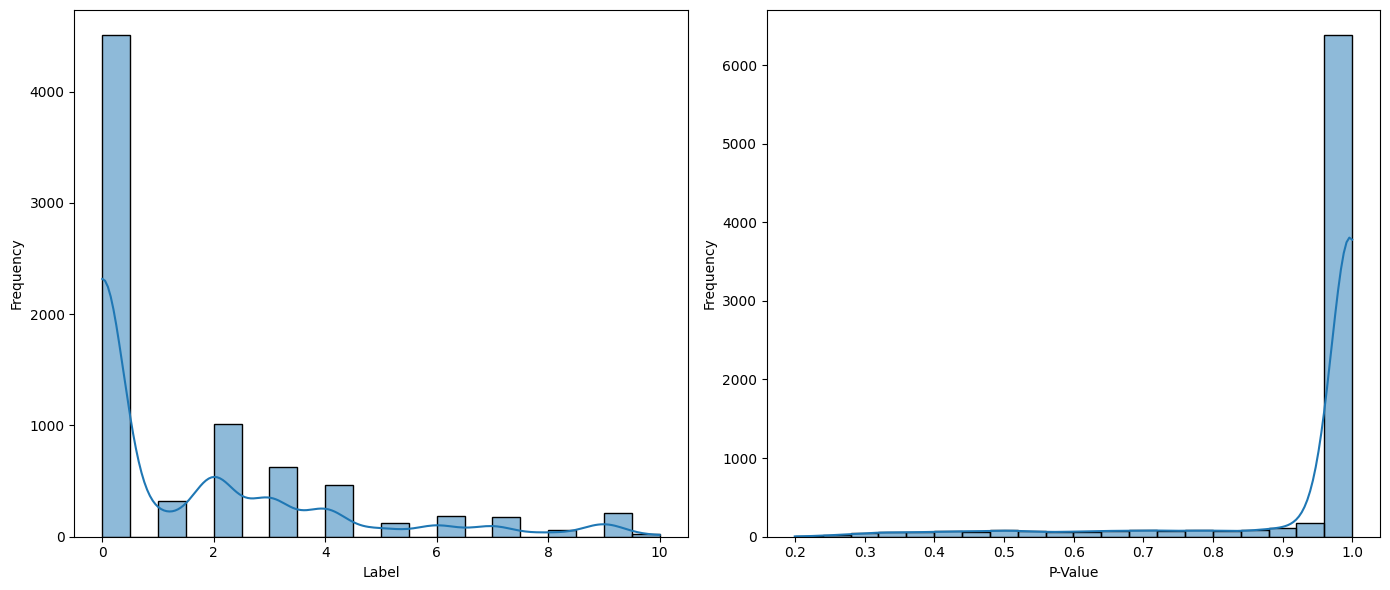

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("processed_data.csv")


print(df.head())

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df['Label'], bins=20, kde=True, ax=axes[0])
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Frequency')


sns.histplot(df['P-Value'], bins=20, kde=True, ax=axes[1])
axes[1].set_xlabel('P-Value')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
